In [1]:
#improting all the required packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#defining the file-directory
fileDir = os.path.dirname(os.path.realpath('__file__'))

In [3]:
#defining the processed data-directory
dataDir = fileDir.strip('analysis') + 'data\\processed_data\\'

# Reading and consolidating the data

In [4]:
#defining data frame for the consolidated loan data
dfLoanData = pd.DataFrame()

In [5]:
#reading loan data stats
for directory, subdirectory, filenames in  os.walk(dataDir + 'loan_data\\'):
    for filename in filenames:
        df = pd.read_csv(os.path.join(directory, filename), encoding = 'ISO-8859-1')
        dfLoanData =  pd.concat([df, dfLoanData], ignore_index=True)

# The best graded loans (A & B) has a higher percentage of loans with no default

In [16]:
dfLoanData.dtypes

IssuedYear              int64
IssuedMonth            object
LoanAmt               float64
Term                    int64
IntRate               float64
Grade                  object
SubGrade               object
EmpTitle               object
EmpLength               int64
HomeStatus             object
AnnualInc             float64
VerificationStatus     object
LoanStatus             object
Purpose                object
State                  object
DTI                   float64
NoOfInqs                int64
AppType                object
CreditHistory           int64
FICO                    int64
DefaultStatus          object
dtype: object

In [17]:
#count number of defaults and non defaults
numberOfDefaults = len(dfLoanData[dfLoanData['DefaultStatus'] == 'Defaulted-Loan'])
numberOfNonDefaults = len(dfLoanData[dfLoanData['DefaultStatus'] == 'Good-Loan'])

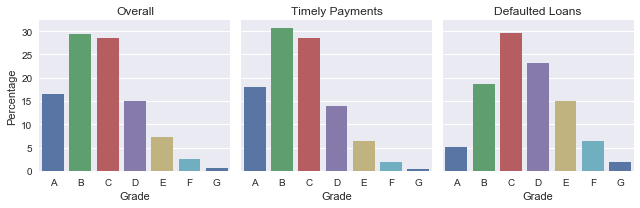

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='Grade', y='LoanAmt', data=dfLoanData, 
            estimator=lambda x: len(x) / (numberOfNonDefaults + numberOfDefaults) * 100,
            ax=ax1, order=sorted(dfLoanData['Grade'].unique()), palette='deep')
sns.barplot(x='Grade', y='LoanAmt', data=dfLoanData[dfLoanData['DefaultStatus'] == 'Good-Loan'], 
            estimator=lambda x: len(x) / numberOfNonDefaults * 100,
            ax=ax2, order=sorted(dfLoanData['Grade'].unique()), palette='deep')
sns.barplot(x='Grade', y='LoanAmt', data=dfLoanData[dfLoanData['DefaultStatus'] == 'Defaulted-Loan'], 
            estimator=lambda x: len(x) / numberOfDefaults * 100,
            ax=ax3, order=sorted(dfLoanData['Grade'].unique()), palette='deep')

ax1.set_title('Overall')
ax2.set_title('Timely Payments')
ax3.set_title('Defaulted Loans')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()